In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob as glob

In [3]:
import astropy.units as u

In [88]:
# unit system
R0 = 1 * u.kpc
V0 = 207.4 * u.km/u.s
T0 = 4.718e-3 * u.Gyr
M0 = 1e10 * u.Msun

In [109]:
def get_N_snapshots(directory):
    """returns the number of snapshots in the directory"""
    return len(glob(directory + "/out/snapshot*.hdf5"))

In [176]:
def get_radii(filename, centre=np.zeros(3)):
    snap = get_snap(filename)
    dx = get_positions(snap) - centre.reshape((-1, 1))
    return np.sqrt(np.sum(dx**2, axis=0))

def get_positions(snap):
    return np.array(snap["PartType1/Coordinates"]).transpose()

def get_snap_name(directory, i):
    return directory + f"/out/snapshot_{str(i).zfill(3)}.hdf5"

def get_snap(filename):
    F = h5py.File(filename, "r")
    return F

def get_part_mass(directory):
    F = get_snap(get_snap_name(directory, 0))
    m = F["PartType1/Masses"][0]
    return m

In [177]:
def get_centres(directory):
    """ returns the file containing the centres from the directory """
    return pd.read_csv(directory + "/centres.csv")

def get_x_cen(directory):
    cens = get_centres(directory)
    return np.array([cens.x, cens.y, cens.z])

In [180]:
def calc_M_inside(directory, radius=0.010):
    """Calculates the M inside the given radius for each snapshot in the directory"""
    centres = get_x_cen(directory)
    N = get_N_snapshots(directory)
    Mins = np.zeros(N)
    m = get_part_mass(directory)
    
    for i in range(N):
        filename = get_snap_name(directory, i)

        rs = get_radii(filename, centres[:, i])
        count = np.sum(rs < radius)
        Mins[i] = count * m
        
    return Mins

In [181]:
x_c = get_x_cen("orbitc")

Text(0, 0.5, 'y / kpc')

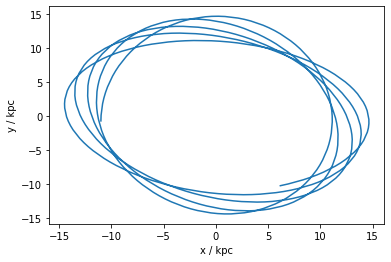

In [182]:
plt.plot(x_c[0, :], x_c[1, :])
plt.xlabel("x / kpc")
plt.ylabel("y / kpc")

In [183]:
directories = ["orbit1", "orbit2", "orbit4", "orbit5"]
labels = [16, 80, 120, 140]
directory_c = "orbitc"

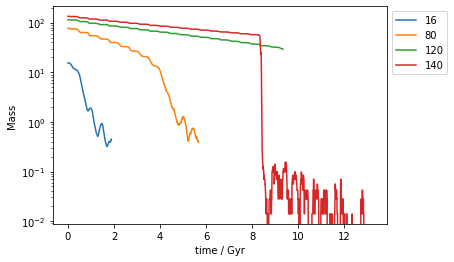

In [187]:
for i in range(len(directories)):
    Ms = calc_M_inside(directories[i])
    cen = get_centres(directories[i])
    plt.plot(cen.t * T0, Ms * M0, label=labels[i])
    
plt.legend(loc="upper left", bbox_to_anchor=(1, 1)) # outside legend
plt.xlabel("time / Gyr")
plt.ylabel("Mass")
plt.yscale("log")

In [185]:
def plot_snap(directory, i):
    pos = get_positions(get_snap_name(directory, i))
    cen = get_x_cen(directory)
    plt.scatter(pos[0, :], pos[1, :], s=1, alpha=0.1)
    plt.scatter(cen[0, i], cen[1, i])
    plt.xlabel("x / kpc")
    plt.ylabel("y / kpc")

In [186]:
plot_snap("orbit1/", 300)

TypeError: string indices must be integers